In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

Veri Seti

In [70]:
df=pd.read_csv("./USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [71]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


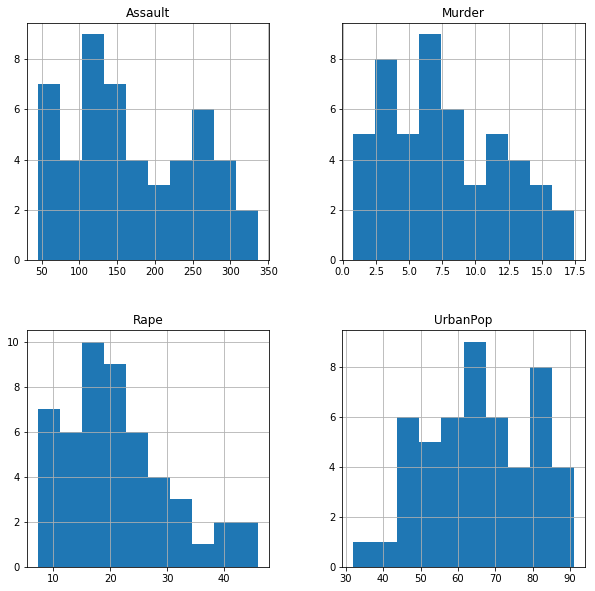

In [74]:
df.hist(figsize=(10,10));

In [75]:
kmeans=KMeans(n_clusters=4)

In [76]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [77]:
k_fit=kmeans.fit(df)

In [78]:
k_fit.n_clusters

4

In [79]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [80]:
k_fit.labels_ #Gözlem birimleri etikerleri

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

#Kümelerin Görselleştirilmesi

In [81]:
k_means= KMeans(n_clusters=2).fit(df)

In [82]:
kümeler= k_means.labels_

In [83]:
kümeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

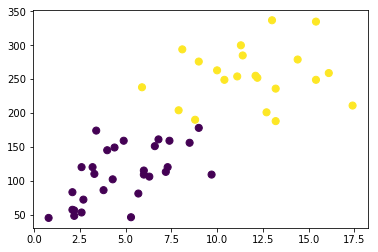

In [84]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kümeler,s=50,cmap="viridis")

In [85]:
merkezler=k_means.cluster_centers_

In [86]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

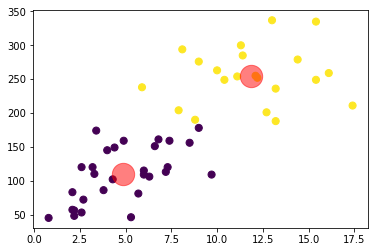

In [87]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kümeler,s=50,cmap="viridis")
plt.scatter(merkezler[:,0],merkezler[:,1],c="red",s=500,alpha=0.5)

In [88]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [89]:
ssd = []
K = range(1,30)

for k in K:
    k_means = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)


Text(0.5, 1.0, 'Optimum küme sayısı için elbow yöntemi')

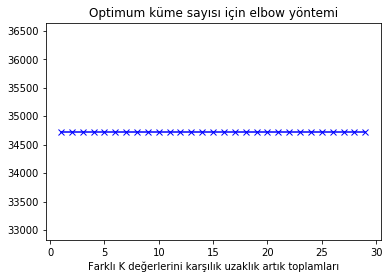

In [90]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K değerlerini karşılık uzaklık artık toplamları")
plt.title("Optimum küme sayısı için elbow yöntemi")

In [96]:
!pip install yellowbrick

In [98]:
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'sklearn.metrics._classification'

In [100]:
kmeans = KMeans()
visu= KElbowVisualizer(kmeans,k(2,20))
visu.fit(df)
visu.poof()

NameError: name 'KElbowVisualizer' is not defined

In [101]:
kmeans=KMeans(n_clusters=4).fit(df)

In [102]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
kumeler=kmeans.labels_

In [104]:
pd.DataFrame({"Eyaletler":df.index,"Kumeler":kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,0


In [105]:
df["KumeNo"]=kumeler

In [107]:
df.head()

,Murder,Assault,UrbanPop,Rape,KumeNo
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
